In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('traincleaned.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025077,0.042033,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.122230,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.375830,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
0                   200000 non-null float64
1                   200000 non-null float64
2                   200000 non-null float64
3                   200000 non-null float64
4                   200000 non-null float64
5                   200000 non-null float64
6                   200000 non-null float64
7                   200000 non-null float64
8                   200000 non-null float64
9                   200000 non-null float64
loan_amount         200000 non-null float64
applicant_income    200000 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 19.8 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,0.453525,0.531540,0.005410,0.009525,0.846310,0.152500,0.001190,0.730515,0.056365,0.213120,3.992973e-17,2.617209e-16,1.974370
std,0.497837,0.499005,0.073354,0.097130,0.360652,0.359506,0.034476,0.443693,0.230626,0.409513,1.000003e+00,1.000003e+00,1.593451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.930963e-01,-6.965148e-01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.301305e-01,-3.175233e-01,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.864135e-01,-1.620397e-01,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.555084e-01,7.118587e-02,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.689038e+01,9.687922e+01,8.000000


In [6]:
df1.shape

(200000, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(200000, 12)

In [11]:
y.shape

(200000,)

### Using Grid Search to find best parameters

In [ ]:
#rfmodel = RandomForestRegressor(n_jobs=-1,random_state=0,verbose=True)

In [ ]:
#params_grid = {'max_depth': [10, 20, 30, 40],
#               'min_samples_split':[4,8,12,16],
#               'min_samples_leaf':[2,3,4,5],
#               'max_features':[2,3,4,5],
#               'n_estimators':[100,200,300,400]
#              }

In [ ]:
#grid_search_rf = GridSearchCV(rfmodel,params_grid,scoring='r2',n_jobs=-1,cv=5,verbose=True)

In [ ]:
#grid_search_rf.fit(X,y)

In [12]:
grid_search_rf = RandomForestRegressor(n_estimators=250,max_depth=10,min_samples_split=2,min_samples_leaf=1,max_features=2,n_jobs=-1,random_state=0,verbose=True)

In [13]:
grid_search_rf.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=True,
                      warm_start=False)

### Load in test set

In [14]:
X_test = pd.read_csv('testmodified.csv')

In [15]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.665492,-0.218602
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185659,0.774446
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.213116,0.273193
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.185004,-0.209144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239917,0.140787


In [16]:
X_test.shape

(200000, 12)

In [18]:
y_predict = grid_search_rf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    1.6s finished


In [19]:
y_predict

array([5.15483446, 1.78423092, 1.65393055, ..., 1.23023349, 1.25682187,
       1.19938176])

In [20]:
y_predict.shape

(200000,)

In [21]:
rfprediction = pd.DataFrame(y_predict)

In [22]:
rfprediction

,0
0,5.154834
1,1.784231
2,1.653931
3,1.658023
4,1.708024
...,...
199995,1.693224
199996,3.399167
199997,1.230233
199998,1.256822


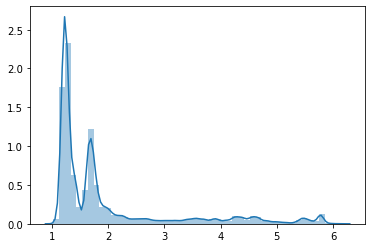

In [23]:
sns.distplot(rfprediction)
plt.show()

### Model Evaluation

In [25]:
MSE = mean_squared_error(y,y_predict)
print("Mean Squared Error is", MSE)

Mean Squared Error is 3.856124386332244


In [26]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 1.964


In [27]:
MAE = mean_absolute_error(y,y_predict)
print("MAE is", MAE)

MAE is 1.3299843882179085


In [28]:
r2 = r2_score(y,y_predict)
print("R2 score is", r2)

R2 score is -0.5187134161770424


In [29]:
rfprediction.to_csv('rfresult.csv')

**Result is 0.5438**